In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [95]:
gravity = 32.2  # ft/s^2
initial_position = math.pi/4
initial_velocity = 0
arm_length = 2 # feet
end_time = 4  # seconds
time_step = 0.025  # seconds
time_range = np.arange(0,end_time + time_step,time_step)

\begin{equation*}
\theta(t) = A\sin(\lambda t) + B\cos(\lambda t)
\end{equation*}

In [16]:
def pendulum_analytical_angle_sol(velocity_naut, theta_naut, length, end_time):
    lambd = math.sqrt(gravity/length)
    A = velocity_naut / lambd
    B = theta_naut
    angle_in_time = []
    for time in time_range:
        angle_in_time.append((A * math.sin(lambd * time)) + (B * math.cos(lambd * time)))
    return angle_in_time

In [17]:
analytical_solution_output = pendulum_analytical_angle_sol(initial_velocity,initial_position,arm_length,end_time)

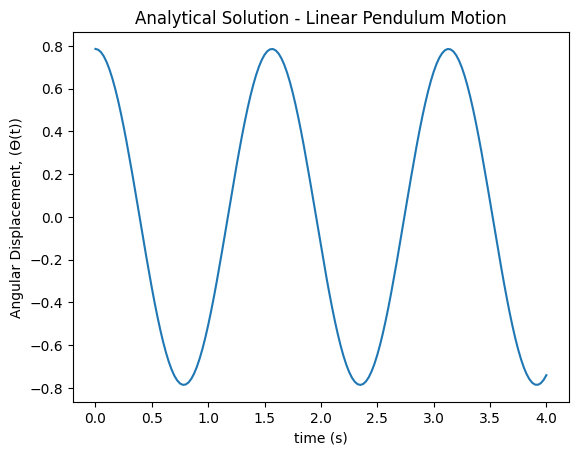

In [18]:
plt.xlabel('time (s)')
plt.ylabel('Angular Displacement, (ϴ(t))')
plt.title('Analytical Solution - Linear Pendulum Motion')
plot_time = np.linspace(0, end_time, len(analytical_solution_output))
plt.plot(plot_time,analytical_solution_output)

\begin{equation*}
v_{i+1} = v_i - \Delta t \lambda^2 \theta_i 
\end{equation*}

\begin{equation*}
\theta_{i+1} = \theta_i + \Delta t v_i
\end{equation*}

In [104]:
def pendulum_numerical_angle_sol_foward_difference(velocity_naut, theta_naut, length, end_time, time_step):
    lambd = math.sqrt(gravity/length)
    velocity_series = [velocity_naut]
    angle_series = [theta_naut]
    
    for i in range(len(time_range) - 1):
        velocity_series.append(velocity_series[i] - (time_step * lambd**2 * angle_series[i]))
        angle_series.append(angle_series[i] + (time_step * velocity_series[i]))
    
    return angle_series

\begin{equation*}
v_{i+1} = v_{i-1} - \Delta t \lambda^2 \theta_{i-1}
\end{equation*}

\begin{equation*}
\theta_{i+1} = \theta_{i-1} + \Delta t v_i
\end{equation*}

In [105]:
def pendulum_numerical_angle_sol_backward_difference(velocity_naut, theta_naut, length, end_time, time_step):
    lambd = math.sqrt(gravity/length)
    velocity_series = [velocity_naut]
    angle_series = [theta_naut]
    
    for i in range(1, len(time_range)):
        velocity_series.append(velocity_series[i-1] - (time_step * lambd**2 * angle_series[i-1]))
        angle_series.append(angle_series[i-1] + (time_step * velocity_series[i]))
        
    return angle_series

\begin{equation*}
v_{i+1} = v_{i-1} - 2 \Delta t \lambda^2 \theta_{i-1}
\end{equation*}

\begin{equation*}
\theta_{i+1} = \frac{\theta_{i-1} + \Delta t v_{i-1} + v_i}{2}
\end{equation*}

In [106]:
def pendulum_numerical_angle_sol_central_difference(velocity_naut, theta_naut, length, end_time, time_step):
    lambd = math.sqrt(gravity/length)
    velocity_series = [velocity_naut]
    angle_series = [theta_naut]
    
    for i in range(1, len(time_range)):
        velocity_series.append(velocity_series[i-1] - (2 * time_step * lambd**2 * angle_series[i-1]))
        angle_series.append((angle_series[i-1] + (time_step * (velocity_series[i-1] + velocity_series[i])) / 2))
        
    return angle_series

In [107]:
numerical_solution_output_forward_difference = pendulum_numerical_angle_sol_foward_difference(initial_velocity,initial_position,arm_length,end_time,time_step)

In [108]:
numerical_solution_output_backward_difference = pendulum_numerical_angle_sol_backward_difference(initial_velocity,initial_position,arm_length,end_time,time_step)

In [109]:
numerical_solution_output_central_difference = pendulum_numerical_angle_sol_central_difference(initial_velocity,initial_position,arm_length,end_time,time_step)

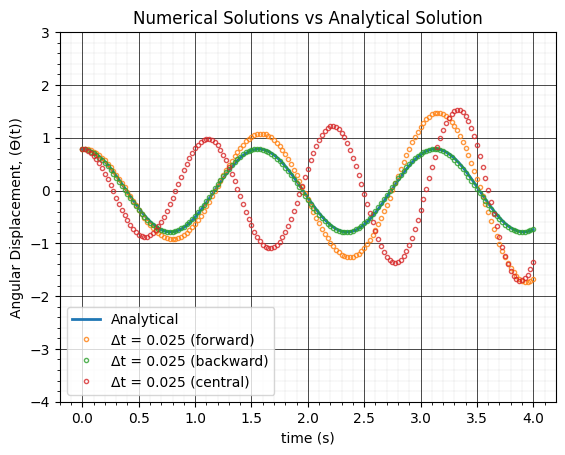

In [110]:
plt.xlabel('time (s)')
plt.ylabel('Angular Displacement, (ϴ(t))')
plt.title('Numerical Solutions vs Analytical Solution')
plt.grid(color = 'black', which = 'major', linestyle = '-', linewidth = 0.5)
plt.grid(color = 'black', which = 'minor', linestyle = '--', linewidth = 0.05)
plt.minorticks_on()
plt.ylim([-4, 3])

plot_time = np.linspace(0, end_time, len(analytical_solution_output))
plt.plot(plot_time,analytical_solution_output, label='Analytical', linewidth=2)
plt.plot(plot_time,numerical_solution_output_forward_difference,"o" , label=f'Δt = {time_step} (forward)', markersize=3, alpha = 0.8, mfc='none')
plt.plot(plot_time,numerical_solution_output_backward_difference,"o" , label=f'Δt = {time_step} (backward)', markersize=3, alpha = 0.8, mfc='none')
plt.plot(plot_time,numerical_solution_output_central_difference,"o" , label=f'Δt = {time_step} (central)', markersize=3, alpha = 0.8, mfc='none')

plt.legend(loc="lower left")

In [111]:
forward_error_plot = []
def calculate_error_forward(numerical_solution, analytical_solution):
    for i in range(len(time_range)):
        forward_error_plot.append(abs(numerical_solution[i] - analytical_solution[i])) 
        print( f'error at time {i*time_step:.2f} = {abs(numerical_solution[i] - analytical_solution[i]):.5f}')

In [112]:
backward_error_plot = []
def calculate_error_backward(numerical_solution, analytical_solution):
    for i in range(len(time_range)):
        backward_error_plot.append(abs(numerical_solution[i] - analytical_solution[i])) 
        print( f'error at time {i*time_step:.2f} = {abs(numerical_solution[i] - analytical_solution[i]):.5f}')

In [113]:
central_error_plot = []
def calculate_error_central(numerical_solution, analytical_solution):
    for i in range(len(time_range)):
        central_error_plot.append(abs(numerical_solution[i] - analytical_solution[i])) 
        print( f'error at time {i*time_step:.2f} = {abs(numerical_solution[i] - analytical_solution[i]):.5f}')

In [114]:
calculate_error_forward(numerical_solution_output_forward_difference,analytical_solution_output)

error at time 0.00 = 0.00000
error at time 0.03 = 0.00395
error at time 0.05 = 0.00785
error at time 0.08 = 0.01159
error at time 0.10 = 0.01504
error at time 0.12 = 0.01810
error at time 0.15 = 0.02066
error at time 0.18 = 0.02261
error at time 0.20 = 0.02387
error at time 0.23 = 0.02436
error at time 0.25 = 0.02400
error at time 0.28 = 0.02275
error at time 0.30 = 0.02057
error at time 0.33 = 0.01743
error at time 0.35 = 0.01333
error at time 0.38 = 0.00828
error at time 0.40 = 0.00231
error at time 0.43 = 0.00454
error at time 0.45 = 0.01220
error at time 0.48 = 0.02059
error at time 0.50 = 0.02961
error at time 0.53 = 0.03917
error at time 0.55 = 0.04912
error at time 0.58 = 0.05933
error at time 0.60 = 0.06966
error at time 0.62 = 0.07994
error at time 0.65 = 0.09002
error at time 0.68 = 0.09973
error at time 0.70 = 0.10889
error at time 0.73 = 0.11734
error at time 0.75 = 0.12491
error at time 0.78 = 0.13143
error at time 0.80 = 0.13676
error at time 0.83 = 0.14074
error at time 

In [115]:
calculate_error_backward(numerical_solution_output_backward_difference,analytical_solution_output)

error at time 0.00 = 0.00000
error at time 0.03 = 0.00395
error at time 0.05 = 0.00788
error at time 0.08 = 0.01173
error at time 0.10 = 0.01546
error at time 0.12 = 0.01905
error at time 0.15 = 0.02245
error at time 0.18 = 0.02563
error at time 0.20 = 0.02856
error at time 0.23 = 0.03121
error at time 0.25 = 0.03354
error at time 0.28 = 0.03555
error at time 0.30 = 0.03719
error at time 0.33 = 0.03847
error at time 0.35 = 0.03936
error at time 0.38 = 0.03985
error at time 0.40 = 0.03995
error at time 0.43 = 0.03964
error at time 0.45 = 0.03893
error at time 0.48 = 0.03783
error at time 0.50 = 0.03635
error at time 0.53 = 0.03449
error at time 0.55 = 0.03229
error at time 0.58 = 0.02976
error at time 0.60 = 0.02692
error at time 0.62 = 0.02381
error at time 0.65 = 0.02046
error at time 0.68 = 0.01689
error at time 0.70 = 0.01315
error at time 0.73 = 0.00926
error at time 0.75 = 0.00528
error at time 0.78 = 0.00124
error at time 0.80 = 0.00282
error at time 0.83 = 0.00686
error at time 

In [116]:
calculate_error_central(numerical_solution_output_central_difference,analytical_solution_output)

error at time 0.00 = 0.00000
error at time 0.03 = 0.00395
error at time 0.05 = 0.01578
error at time 0.08 = 0.03528
error at time 0.10 = 0.06201
error at time 0.12 = 0.09532
error at time 0.15 = 0.13432
error at time 0.18 = 0.17795
error at time 0.20 = 0.22496
error at time 0.23 = 0.27395
error at time 0.25 = 0.32342
error at time 0.28 = 0.37178
error at time 0.30 = 0.41739
error at time 0.33 = 0.45862
error at time 0.35 = 0.49388
error at time 0.38 = 0.52163
error at time 0.40 = 0.54048
error at time 0.43 = 0.54916
error at time 0.45 = 0.54661
error at time 0.48 = 0.53197
error at time 0.50 = 0.50463
error at time 0.53 = 0.46427
error at time 0.55 = 0.41081
error at time 0.58 = 0.34451
error at time 0.60 = 0.26591
error at time 0.62 = 0.17586
error at time 0.65 = 0.07549
error at time 0.68 = 0.03379
error at time 0.70 = 0.15029
error at time 0.73 = 0.27212
error at time 0.75 = 0.39718
error at time 0.78 = 0.52320
error at time 0.80 = 0.64780
error at time 0.83 = 0.76852
error at time 

In [117]:
time_index = []

for i in range(len(time_range)):
    time_index.append(i*time_step)

(0.0, 4.0)

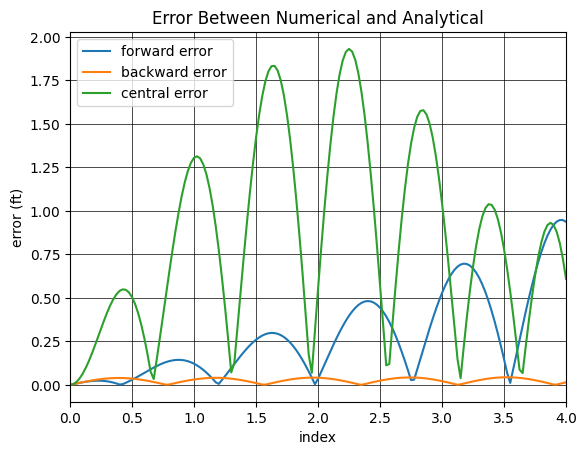

In [118]:
# plot errors
plt.plot(time_index, forward_error_plot,"-" , label='forward error', markersize=3)
plt.plot(time_index,backward_error_plot,"-" , label='backward error', markersize=3)
plt.plot(time_index,central_error_plot,"-" , label='central error', markersize=3)
plt.xlabel('index')
plt.ylabel('error (ft)')
plt.title('Error Between Numerical and Analytical')
plt.grid(color = 'black', which = 'major', linestyle = '-', linewidth = 0.5)
plt.grid(color = 'black', which = 'minor', linestyle = '--', linewidth = 0.05)
plt.legend(loc="upper left")
plt.xlim([0, end_time])

In [147]:
# adding some general output functionality for quiz prep

In [148]:
def pendulum_numerical_sol_outputs(velocity_naut, theta_naut, length, end_time, time_step):
    lambd = math.sqrt(gravity/length)
    velocity_series = [velocity_naut]
    angle_series = [theta_naut]
    
    for i in range(len(time_range) - 1):
        velocity_series.append(velocity_series[i] - (time_step * lambd**2 * angle_series[i]))
        angle_series.append(angle_series[i] + (time_step * velocity_series[i]))
    
    return angle_series, velocity_series

In [149]:
numerical_solution_forward_difference_outputs = pendulum_numerical_sol_outputs(initial_velocity,initial_position,arm_length,end_time,time_step)

In [150]:
def info_at_time():
    for i in range(len(time_range)):
        print(f'at time {i*time_step}, angular displacement = {numerical_solution_forward_difference_outputs[0][i]}, velocity = {numerical_solution_forward_difference_outputs[1][i]}')

info_at_time()

at time 0.0, angular displacement = 0.7853981633974483, velocity = 0
at time 0.025, angular displacement = 0.7853981633974483, velocity = -0.31612276076747303
at time 0.05, angular displacement = 0.7774950943782615, velocity = -0.6322455215349461
at time 0.07500000000000001, angular displacement = 0.7616889563398879, velocity = -0.9451872970221964
at time 0.1, angular displacement = 0.738059273914333, velocity = -1.2517671019490013
at time 0.125, angular displacement = 0.706765096365608, velocity = -1.5488359596995205
at time 0.15000000000000002, angular displacement = 0.66804419737312, velocity = -1.8333089109866778
at time 0.17500000000000002, angular displacement = 0.622211474598453, velocity = -2.1021967004293587
at time 0.2, angular displacement = 0.5696565570877191, velocity = -2.352636818955236
at time 0.225, angular displacement = 0.5108406366138383, velocity = -2.581923583183043
at time 0.25, angular displacement = 0.4462925470342622, velocity = -2.787536939420113
at time 0.27